In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

In [33]:
dataset = pd.read_excel("../data/dataset_draft2.xlsx", index_col=0, dtype = {"gameId": "str"})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7194 entries, 0 to 7193
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gameId             7194 non-null   object 
 1   headtoHeadWinrate  7194 non-null   float64
 2   teamWinrateDiff    7194 non-null   float64
 3   Blue_Top_kda       7194 non-null   float64
 4   Blue_Jgl_kda       7194 non-null   float64
 5   Blue_Mid_kda       7194 non-null   float64
 6   Blue_Adc_kda       7194 non-null   float64
 7   Blue_Spt_kda       7194 non-null   float64
 8   Red_Top_kda        7194 non-null   float64
 9   Red_Jgl_kda        7194 non-null   float64
 10  Red_Mid_kda        7194 non-null   float64
 11  Red_Adc_kda        7194 non-null   float64
 12  Red_Spt_kda        7194 non-null   float64
 13  winner             7194 non-null   object 
dtypes: float64(12), object(2)
memory usage: 843.0+ KB


In [34]:
dataset["winner"].head()

0     Red
1     Red
2     Red
3     Red
4    Blue
Name: winner, dtype: object

In [35]:
label_incoder = LabelEncoder()
dataset["winner"] = label_incoder.fit_transform(dataset["winner"])
dataset["winner"].head()

0    1
1    1
2    1
3    1
4    0
Name: winner, dtype: int32

In [36]:
dropped_dataset = dataset.drop(["gameId"], axis=1)
desired_X_column_list = list(dropped_dataset.columns)
desired_X_column_list.remove("winner")
dropped_dataset.drop_duplicates(desired_X_column_list)
y = dropped_dataset["winner"]
X = dropped_dataset.drop(["winner"], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7194 entries, 0 to 7193
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   headtoHeadWinrate  7194 non-null   float64
 1   teamWinrateDiff    7194 non-null   float64
 2   Blue_Top_kda       7194 non-null   float64
 3   Blue_Jgl_kda       7194 non-null   float64
 4   Blue_Mid_kda       7194 non-null   float64
 5   Blue_Adc_kda       7194 non-null   float64
 6   Blue_Spt_kda       7194 non-null   float64
 7   Red_Top_kda        7194 non-null   float64
 8   Red_Jgl_kda        7194 non-null   float64
 9   Red_Mid_kda        7194 non-null   float64
 10  Red_Adc_kda        7194 non-null   float64
 11  Red_Spt_kda        7194 non-null   float64
dtypes: float64(12)
memory usage: 730.6 KB


In [37]:
X.describe()

,headtoHeadWinrate,teamWinrateDiff,Blue_Top_kda,Blue_Jgl_kda,Blue_Mid_kda,Blue_Adc_kda,Blue_Spt_kda,Red_Top_kda,Red_Jgl_kda,Red_Mid_kda,Red_Adc_kda,Red_Spt_kda
count,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000,7194.000000
mean,0.495038,0.002245,4.449423,5.523583,5.805209,6.215429,5.571439,4.525407,5.585666,5.835033,6.270366,5.626504
std,0.184054,0.202201,1.766150,2.188871,2.250277,2.269533,2.325368,1.798515,2.207438,2.255128,2.310944,2.338421
min,0.083333,-0.677419,0.190476,0.569286,0.125000,0.511111,0.359524,0.166667,0.255952,0.166667,0.641667,0.111111
25%,0.333333,-0.130073,3.216667,3.968333,4.290000,4.650417,3.887143,3.280000,4.023750,4.276726,4.698750,3.980893
50%,0.500000,0.000000,4.413333,5.484813,5.705193,6.129330,5.434881,4.427688,5.484813,5.705193,6.129330,5.434881
75%,0.642857,0.131168,5.570000,6.912500,7.185000,7.652963,6.982500,5.609226,6.986250,7.240000,7.700000,7.019167
max,0.923077,0.696970,13.840000,14.450000,17.866667,17.466667,21.800000,14.733333,14.443333,17.333333,15.750000,16.250000


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [41]:
y_pred = model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6157053509381515


In [43]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

# 최적의 하이퍼파라미터로 모델 재학습
best_model = grid_search.best_estimator_

# 예측
y_pred_best = best_model.predict(X_test)

# 정확도 출력
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"mse with tuned parameters: {mse_best:.4f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits


KeyboardInterrupt: 

In [ ]:
feature_importances = best_model.feature_importances_
features = list(X.columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_features = importance_df.head(10)

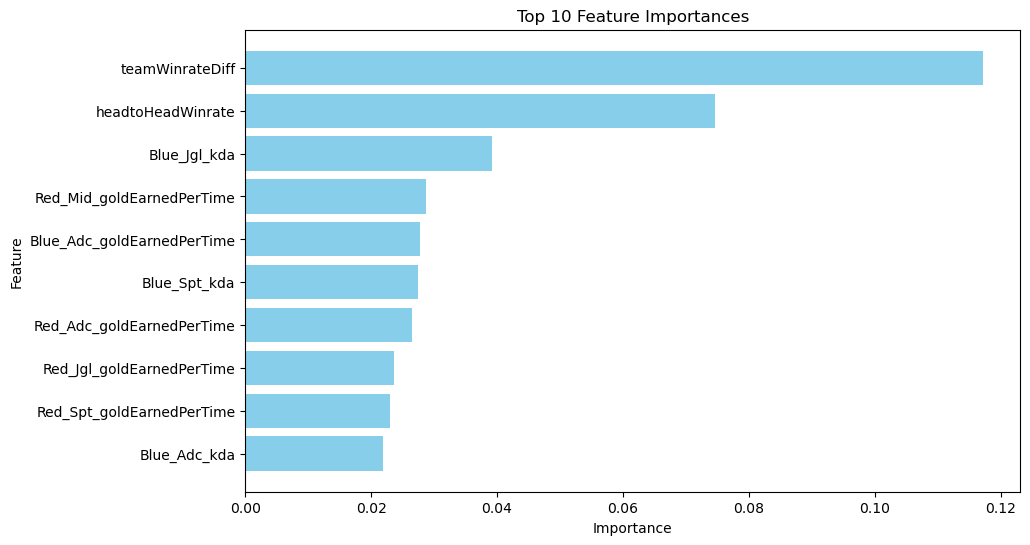

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()